# primäre Hüfte 2022

In [1]:
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt

In [2]:
conn = psycopg2.connect("host='192.168.178.78'  dbname='prothesen'  user='postgres' password='postgres' ")

In [3]:
cur = conn.cursor()

In [4]:
cur.execute("select * from prothesen where opdatum >='2022-01-01' and opdatum < '2022-12-31';")

In [5]:
read = cur.fetchall()

In [6]:
cnames = ["id", "patientennummer", "prothesenart", "prothesentyp", "proximal", "distal", "seite", "wechseleingriff",
          "praeop_roentgen", "postop_roentgen", "fraktur", "planung", "opdatum", "operateur", "assistenz", "op_zeiten",
          "infektion", "luxation", "inklinationswinkel", "trochanterabriss", "fissuren", "thrombose_embolie",
          "sterblichkeit", "neurologie", "dokumentation", "memo", "knochenverankert", "periprothetisch",
          "reintervention", "abweichung", "ct", "ab_imp_art", "ab_imp_groesse", "ab_stab", "ab_blutung", "ab_praeop",
          "ab_operation", "ab_anaesthesie", "spaet_infekt", "einweiser", "neunzig_tage", "kniewinkel_prae",
          "kniewinkel_post", "vierundzwanzig_plus", "oak"]

In [7]:
df = pd.DataFrame(read, columns=cnames)

In [8]:
huefte_p = df[(df['prothesenart'] == 'Hüfte') & (df['wechseleingriff'] == False) & (df['fraktur'] == False)]

In [9]:
huefte_p['id'].count()

211

In [10]:
huefte_p.groupby('infektion').size()

infektion
False    209
True       2
dtype: int64

In [11]:
huefte_p.groupby('luxation').size()

luxation
False    211
dtype: int64

In [12]:
huefte_p.groupby(huefte_p['inklinationswinkel'] > 50).size()

inklinationswinkel
False    203
True       8
dtype: int64

In [13]:
huefte_p.groupby('trochanterabriss').size()

trochanterabriss
False    210
True       1
dtype: int64

In [14]:
huefte_p.groupby('fissuren').size()

fissuren
False    206
True       5
dtype: int64

In [15]:
huefte_p.groupby(huefte_p['inklinationswinkel'] > 50).size()

inklinationswinkel
False    203
True       8
dtype: int64

In [16]:
huefte_p.groupby(huefte_p['inklinationswinkel'] > 50).size()[1] * 100 / huefte_p['inklinationswinkel'].count()




3.8461538461538463

In [17]:

def runden(zahl):
    return round(zahl / 5) * 5


inkl = huefte_p.groupby(runden(huefte_p['inklinationswinkel'])).size()
opz = huefte_p.groupby(runden(huefte_p['op_zeiten'])).size()

inklinationswinkel
30.0     7
35.0    20
40.0    58
45.0    81
50.0    37
55.0     5
dtype: int64

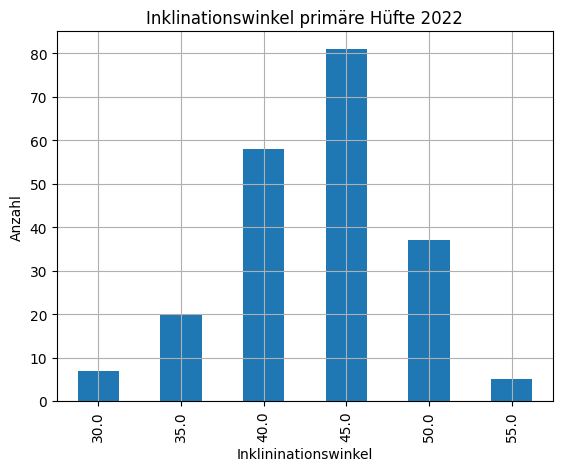

In [18]:
plot1 = inkl.plot(kind='bar', xlabel='Inklininationswinkel', ylabel='Anzahl', grid=True,
                  title='Inklinationswinkel primäre Hüfte 2022')
# plot1.bar_label(plot1.containers[0])
inkl

In [19]:
huefte_p.groupby(huefte_p['op_zeiten'] > 100).size()

op_zeiten
False    204
True       7
dtype: int64

op_zeiten
40.0      2
45.0      6
50.0     19
55.0     34
60.0     34
65.0     27
70.0     15
75.0     23
80.0     14
85.0      8
90.0      7
95.0      9
100.0     6
105.0     1
110.0     1
120.0     1
135.0     2
145.0     1
155.0     1
dtype: int64

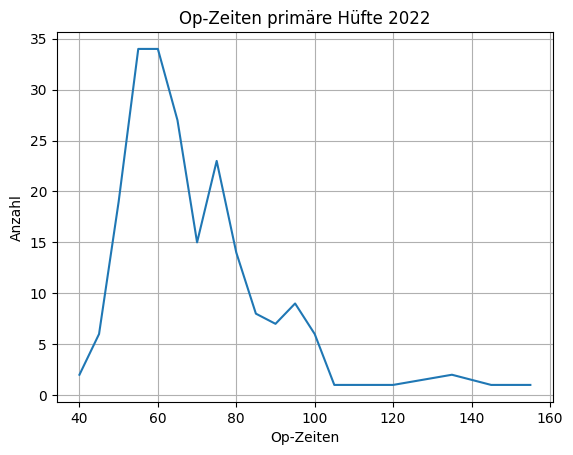

In [20]:
plot2 = opz.plot(kind='line', xlabel='Op-Zeiten', ylabel='Anzahl', grid=True,
                 title='Op-Zeiten primäre Hüfte 2022')
# plot2.bar_label(plot2.containers[0])
opz

In [21]:
huefte_p.groupby('thrombose_embolie').size()

thrombose_embolie
False    211
dtype: int64

In [22]:
huefte_p.groupby('sterblichkeit').size()

sterblichkeit
False    210
True       1
dtype: int64